<a href="https://colab.research.google.com/github/kahuroA/Descriptive-Statistics-Excercises/blob/main/Copy_of_Python_Programming_Stratified_Sampling_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Stratified Sampling Exercise

## Example

We are going to use the example we looked at in the overview. Our dataset is comprised of different heights of Moringa School students. It has 10,000 entries whereby 60% are female and 40% are Male. We are going to perform stratified sampling on this population so that we can get a sample of 1000 students which has the same proportion as the population.

**Import relevant Libraries**

In [1]:
import pandas as pd


**Load the Dataset**

Here is the dataset we are going to use in this example.[Dataset Download](https://drive.google.com/file/d/1ODcSRSs_isRKCAShFwnMrXdcphed9kYn/view?usp=sharing)

In [2]:
# Load the data into a panda dataframe
data= pd.read_csv('Gender_heights.csv')

# Check out the data
data



,gender,ht
0,F,55.398043
1,F,64.975468
2,F,70.591667
3,F,63.574479
4,F,62.535298
...,...,...
9995,M,91.485240
9996,M,94.842755
9997,M,98.096696
9998,M,91.478957


In [3]:
# Now we will confirm how many Female students and Male students are there in our dataset.
# To achieve this we will use pandas .value_count() method. This method outputs the number of times a value appears in a column.
data['gender'].value_counts()

F    6000
M    4000
Name: gender, dtype: int64

Now that we have confirmed that our popluation follows the correct proportion, we are going to first create a random sample of 1000 students without stratification just to see how it behaves.

In [4]:
# To create a random sample from a dataframe we use the pandas sample method. You can read more about it here.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
# We pass in an argument called frac which symbolises the fraction of the population we want to use as our sample

# Non stratified sample
non_strat_output = data.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(non_strat_output['gender'].value_counts())

F    614
M    386
Name: gender, dtype: int64


Run the code several times, taking note of the proportion of Female and Male. What do you notice?

When you run it several time, you'll notice that the proportion varies each time. Although it ranges closely to our desired proportion, its not quite the 60-40 proportion we want. To remedy it, this is where stratified sampling comes in handy.

Let's us create a stratified random sample and see how it behaves

In [5]:

# To create a stratified random sample we'll use pandas groupBy method. Basically what the method does is that it splits our dataset into sets and then applies a function on each subset.
# In our case, we are going to applies a function that puts each subset into a random sample with a size of 100. The beauty about this method is that it strictly maintains the populations proportion.

# Stratified sample
strat_output = data.groupby('gender', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(strat_output['gender'].value_counts())

# Check the stratified output
print(strat_output)

 

F    600
M    400
Name: gender, dtype: int64
     gender         ht
5978      F  62.145475
1468      F  60.623567
1732      F  63.367706
3426      F  55.835200
1480      F  49.946640
...     ...        ...
9152      M  85.888857
9890      M  90.919419
9137      M  89.542277
6170      M  90.464325
8255      M  94.203486

[1000 rows x 2 columns]


## <font color="green">Challenges</font>

In [8]:
# Challenge 1
# ---
# Question: Moringa school is doing an analysis on how the students perform based on the different programmes that they offer.
# Given a dataset of 10000 students and you are told that 50% are Core students, 25% are Prep students and 25% are Pre-prep students. 
# Also in the dataset, 60% of the students are Female and the rest are Male. 
# You are tasked with creating a stratified random sample that represents that population.
# ---
# Dataset Source =g https://drive.google.com/file/d/10THQj3iqund_D5tgypBdeKoc2FZ9pC0S/view?usp=sharin
# ---
# 
df=pd.read_csv('Moringa_Students_heights.csv')
df.head()

,programme,gender,ht
0,Prep,F,57.861539
1,Prep,F,65.550765
2,Core,F,52.142763
3,Pre-prep,F,69.453854
4,Pre-prep,F,54.203258


In [21]:
strat1=df.groupby(['gender','programme'], group_keys=False).apply(lambda x: x.sample(frac=0.1))
print(strat1['gender'].value_counts())
print(strat1['programme'].value_counts())

F    599
M    401
Name: gender, dtype: int64
Core        500
Prep        250
Pre-prep    250
Name: programme, dtype: int64


In [22]:
# Challenge 2
# ---
# Question: A wine company would like to perform some analysis on a variety of new red wines. 
# Select a stratified sample based on wine quality from the given dataset.
# ---
# Dataset url = http://bit.ly/RedWinesDataset
# ---
# 
df_wine=pd.read_csv('http://bit.ly/RedWinesDataset')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
wine_strat=df_wine.groupby('quality').apply(lambda x: x.sample(frac=0.5))
print(wine_strat['quality'].value_counts())

5    340
6    319
7    100
4     26
8      9
3      5
Name: quality, dtype: int64


In [25]:
# Challenge 3
# ---
# Question: You have been provided with a list of employees of a certain company with some details about their gender (male/female) 
# and their type of employment (full-time/part-time). The HR team wants to conduct a survey on the working condition 
# that will be representative of the general opinion without interviewing every employee. 
# They request you conduct stratified sampling before any analysis is done. 
# ---
# Dataset url = http://bit.ly/StratifiedEmployeeDataset
# ---
# Hint: Perform EDA first
# ---
#
df_employee=pd.read_excel('http://bit.ly/StratifiedEmployeeDataset')
df_employee.head()

,Employee,Gender,Time,Strata
0,Em001,Male,Full-time,MF
1,Em002,Male,Part-time,MP
2,Em003,Male,Full-time,MF
3,Em004,Female,Part-time,FP
4,Em005,Male,Full-time,MF


In [26]:
df_employee.shape

(97, 4)

In [30]:
#check the datatypes
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Employee  97 non-null     object
 1   Gender    97 non-null     object
 2   Time      97 non-null     object
 3   Strata    97 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [27]:
#check for missing values
df_employee.isnull().sum()

Employee    0
Gender      0
Time        0
Strata      0
dtype: int64

In [29]:
#check for duplicates
df_employee.duplicated().sum()

0

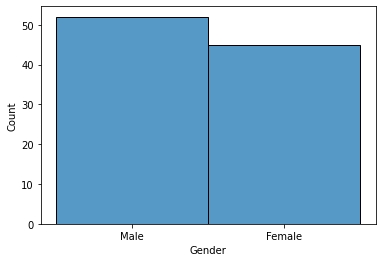

In [33]:
#EDA
#check the distributions of the columns
#Gender column
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df_employee['Gender'])

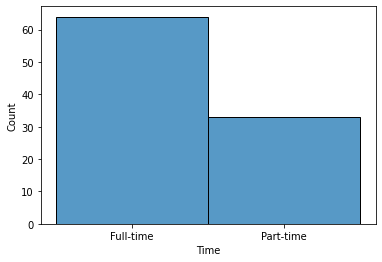

In [34]:
#Time column
sns.histplot(df_employee['Time'])

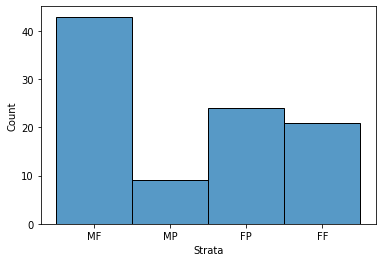

In [35]:
#Strata
sns.histplot(df_employee['Strata'])

In [36]:
#We will do the stratified sampling based on Gender and Strata columns as our startas
emp_strat=df_employee.groupby(['Gender','Strata'], group_keys=False).apply(lambda x: x.sample(frac=0.5))
print(emp_strat['Gender'].value_counts())
print(emp_strat['Strata'].value_counts())

Male      26
Female    22
Name: Gender, dtype: int64
MF    22
FP    12
FF    10
MP     4
Name: Strata, dtype: int64
